In [1]:
import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [3]:
path = r'C:\Users\nishe\Desktop\zhou课题\code\solutions\pre\from_normal_state.h5'
solution = tdgl.Solution.from_hdf5(path)

Exception in thread Thread-15 (_readerthread):
Traceback (most recent call last):
  File "d:\Anaconda3\envs\tdgl\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "d:\Anaconda3\envs\tdgl\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Anaconda3\envs\tdgl\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Anaconda3\envs\tdgl\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "d:\Anaconda3\envs\tdgl\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 30: invalid start byte
d:\Anaconda3\envs\tdgl\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of

Time: 0.0s  Field: 0.00mT


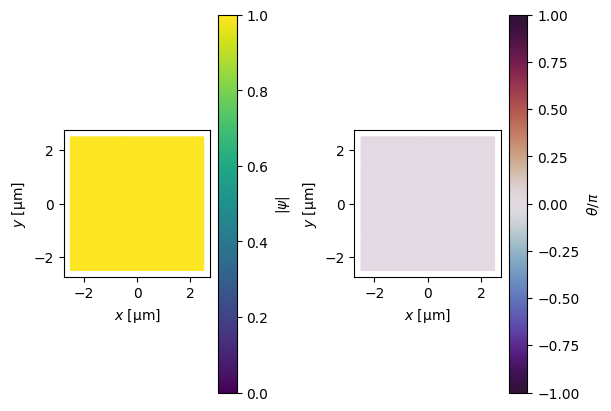

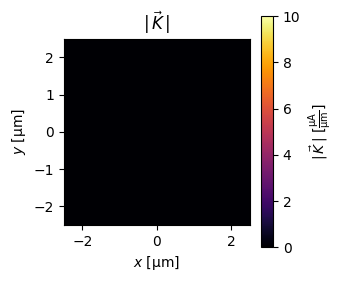

Time: 300.1s  Field: 0.50mT


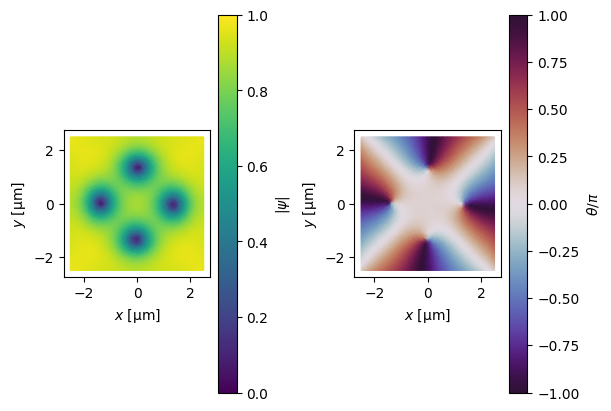

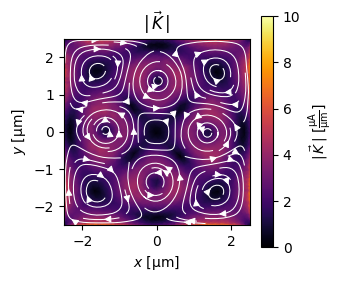

Time: 600.4s  Field: 1.01mT


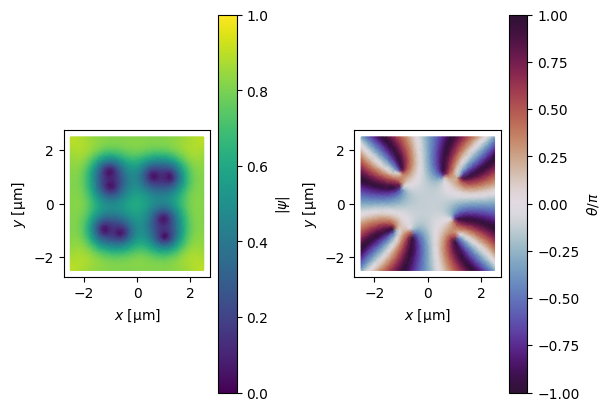

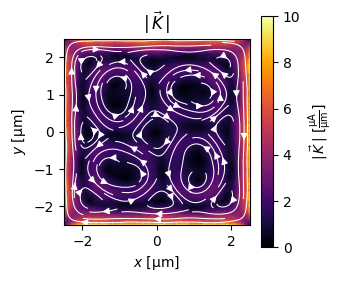

Time: 900.2s  Field: 2.99mT


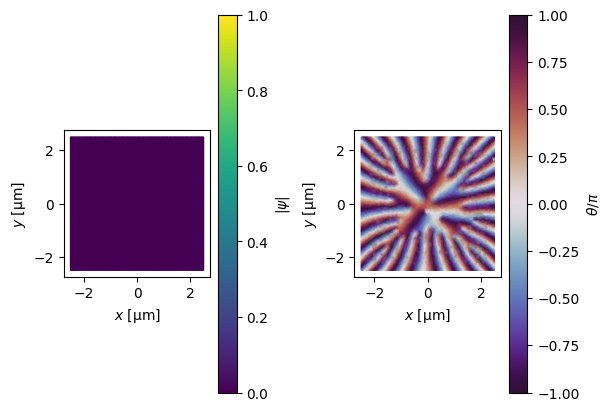

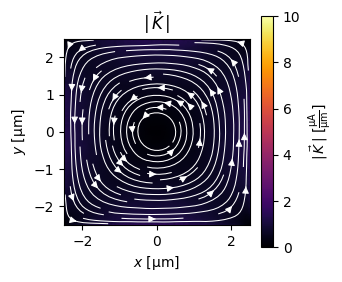

Time: 1199.8s  Field: 1.00mT


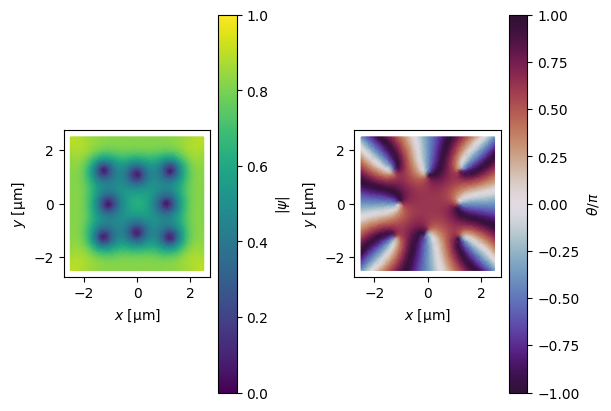

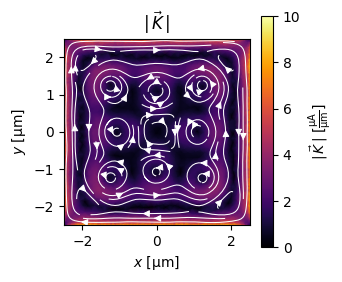

Time: 1499.7s  Field: 0.50mT


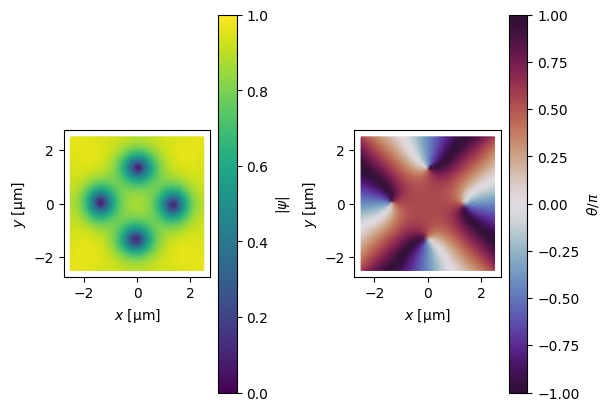

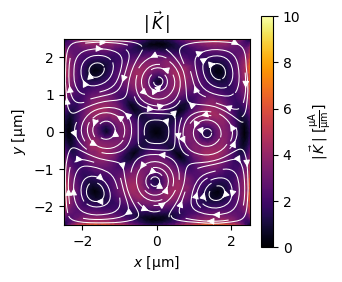

In [5]:
def plot_simulations_of_times(solution, setpoints):
    '''
    Plot the order parameter and current at the time that is closest to the given time points.
    '''
    for time in setpoints:

        step = solution.closest_solve_step(time)
        exact_time = solution.times[step]
        solution.load_tdgl_data(step)

        A = solution.applied_vector_potential(np.array([-1, 1]), np.array([-1, 1]), 0, t=exact_time)
        Bz = A[0, 0] - A[1, 0]

        print('Time: {exact_time:.1f}s  Field: {field:.2f}{unit}'.format(exact_time = solution.times[step], field = Bz, unit=solution.field_units))
        fig, axes = solution.plot_order_parameter(figsize=(6, 4))
        solution.plot_currents(min_stream_amp=0.075, vmin=0, vmax=10, figsize = (3,3))

        plt.show()

samples = range(0, 1800, 300)

plot_simulations_of_times(solution, samples)